# Zadaci za vježbu za II kolokvij

Pokrenite sva polja (Cell-> Run all) da biste dobili zadatke. Zadaci i rješenja ispisani su kao rezultat izvođenja, nije potrebno čitati programsko polje.

Za izmjenu brojeva u zadacima, promijenite varijablu seed. Odgovori će biti točni za nove varijable.

Zadaci ne obuhvaćaju sva teorijska pitanja.

In [36]:
%matplotlib inline
import random
from scipy.signal import lti, step
import control
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [37]:
# promijenite broj i pokrenite sve ponovo za druge brojeve u zadacima
seed = 12345

### Direktno upravljanje

In [38]:
print('Kod direktnog sustava upravljanja, dodavanje korektora vodeće veličine ima za rezultat ...')

print('Kod direktnog sustava upravljanja, dodavanje kompenzatora smetnje ima za rezultat ...')

Kod direktnog sustava upravljanja, dodavanje korektora vodeće veličine ima za rezultat ...
Kod direktnog sustava upravljanja, dodavanje kompenzatora smetnje ima za rezultat ...


In [39]:
print('Odrediti prijenosnu funkciju korektora vodeće veličine za prijenosnu funkciju procesa')
display(Markdown(r'$G=\frac{1}{1+3s}$'))
print('Željena dinamika procesa iznosi')
display(Markdown(r'$G_2=\frac{1}{1+0.5s}$'))

Odrediti prijenosnu funkciju korektora vodeće veličine za prijenosnu funkciju procesa


$G=\frac{1}{1+3s}$

Željena dinamika procesa iznosi


$G_2=\frac{1}{1+0.5s}$

In [40]:
print('Odrediti prijenosnu funkciju kompenzatora smetnje za proces definiran kao')
display(Markdown(r'$y(s)=\frac{1}{1+3s}u(s) + \frac{1}{1+4s}d(s)$'))
print('gdje je u(s) upravljani ulaz u proces, a d(s) ulaz smetnje.')

Odrediti prijenosnu funkciju kompenzatora smetnje za proces definiran kao


$y(s)=\frac{1}{1+3s}u(s) + \frac{1}{1+4s}d(s)$

gdje je u(s) upravljani ulaz u proces, a d(s) ulaz smetnje.


### Povratna veza

In [41]:
print('Označiti na blok dijagramu povratne veze što je: regulator, aktuator, proces, senzor.')

Označiti na blok dijagramu povratne veze što je: regulator, aktuator, proces, senzor.


### PID regulator

In [42]:
print('Označiti na blok PID regulatora što je pojedina komponenta.')

Označiti na blok PID regulatora što je pojedina komponenta.


In [43]:
print('Funkcija izlaza PID regulatora definira se kao...')

display(Markdown(r'$u(t)=K_P\left ( e(t)+\frac{1}{T_I}\int_{0}^{t}e(\tau)d\tau+T_D\frac{\mathrm{d}e }{\mathrm{d} t} \right )$'))


Funkcija izlaza PID regulatora definira se kao...


$u(t)=K_P\left ( e(t)+\frac{1}{T_I}\int_{0}^{t}e(\tau)d\tau+T_D\frac{\mathrm{d}e }{\mathrm{d} t} \right )$

In [44]:
print('Prijenosna funkcija PID regulatora ima oblik...')

Prijenosna funkcija PID regulatora ima oblik...


In [45]:
print('Koja je komponenta PID regulatora najosjetljivija na šum u povratnoj vezi?\n')
print('R:\nD komponenta')

Koja je komponenta PID regulatora najosjetljivija na šum u povratnoj vezi?

R:
D komponenta


In [46]:
random.seed(seed+21)

Kr = random.choice([1, 2, 3, 4, 5])
Ti = random.choice([1, 2, 3, 4, 5])
t = random.choice([1, 2, 3, 4, 5])
u = random.choice([1, 2, 3, 4, 5])

yf = u*Kr + u*Kr/Ti*t/2

print('Odrediti izlaz PID regulatora u t={}s, za parametre Kr={}, TI={}, KD=0, za ulaz u regulator u(s) = {}/s.'.format(t, Kr, Ti, u))
print('\nR:')
print('y(t={}s)={}'.format(t, yf))

Odrediti izlaz PID regulatora u t=3s, za parametre Kr=3, TI=5, KD=0, za ulaz u regulator u(s) = 1/s.

R:
y(t=3s)=3.9


### Parametriranje regulatora

Prema Ziegler Nichols metodi odredite parametre PI/PID regulatora, ako je P regulatorom pojačanja Kr = {} postignut odziv prema slici:


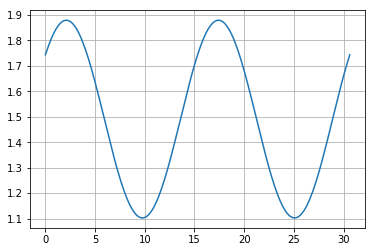

Rješenje:
PI:


$K_p=2.11, T_I=13.02s$

PID:


$K_p=2.81, T_I=7.66s, T_D=1.84s$

In [47]:
# postavljanje parametara PID - Ziegler Nichols
random.seed(seed+1)
Kpkr = random.uniform(0.1, 10)
Tkr = random.uniform(2, 20)

PID_K = 0.6*Kpkr
PID_TI = 0.5*Tkr
PID_TD = 0.12*Tkr

PI_K = 0.45*Kpkr
PI_TI = 0.85*Tkr

t = np.linspace(0, Tkr*2, 200)
y = random.random()*np.sin(2*np.pi/Tkr*t+random.random())+random.random()*2

plt.figure()
plt.plot(t, y)
plt.grid()

print('Prema Ziegler Nichols metodi odredite parametre PI/PID regulatora, ako je P regulatorom pojačanja Kr = {} postignut odziv prema slici:')
plt.show()
print('Rješenje:')
print('PI:')
display(Markdown(r'$K_p={:.2f}, T_I={:.2f}s$'.format(PI_K, PI_TI)))
print('PID:')
display(Markdown(r'$K_p={:.2f}, T_I={:.2f}s, T_D={:.2f}s$'.format(PID_K, PID_TI, PID_TD)))

### Prijenosne funkcije

Iz položaja polova i nula u kompleksnoj ravnini odredite prijenosnu funkciju sustava, ako je pojačanje procesa Kp=3.


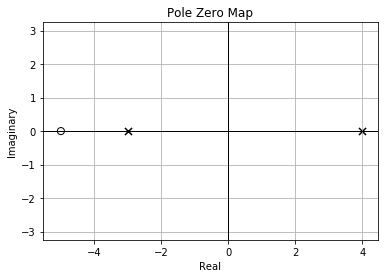

R:


$G_P(s)=3\frac{s+5}{(s-4)(s+3)}$

ili



  3 s + 15
------------
s^2 - s - 12

In [48]:
random.seed(seed+5)

candidates = set(range(-5,5))
candidates.remove(0)

p1, p2, z1 = random.sample(candidates, 3)

Kp = random.choice(range(1,5))

Glti = lti([z1], [p1, p2], Kp).to_tf()
G = control.tf(Glti.num, Glti.den)

#plt.figure()
control.pzmap(G)
plt.grid()
print('Iz položaja polova i nula u kompleksnoj ravnini odredite prijenosnu funkciju sustava, ako je pojačanje procesa Kp={:.0f}.'.format(Kp))
plt.show()
print('R:')
display(Markdown(r'$G_P(s)={}\frac{{s{:+}}}{{(s{:+})(s{:+})}}$'.format(Kp,-z1, -p1, -p2)))
print('ili')
display(G)

Koliko iznosi nadvišenje i vrijeme prvog maksimuma odziva na slici?


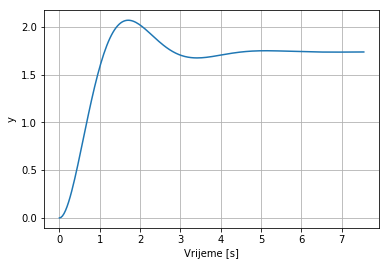

R: 


$\sigma_m$=19.06\%, $t_m$=1.7s

In [49]:
# pokazatelji kvalitete
random.seed(seed)

zeta = random.uniform(0.3, 0.7)
w_n = random.uniform(2, 10)
K = random.uniform(0.5, 2)

G = control.tf([K*w_n*w_n], [1, 2*zeta*w_n, w_n*w_n])

oversh = 100*np.exp(-zeta*np.pi/np.sqrt(1-zeta**2))
t_oversh = np.pi/w_n/np.sqrt(1-zeta**2)

fig = plt.figure()
ax = fig.add_subplot(111)

T = np.linspace(0, 5*np.pi/w_n, 200)
t, y = control.step_response(G, T)
ax.grid()
ax.set_xlabel('Vrijeme [s]')
ax.set_ylabel('y')
ax.plot(t, y)

print('Koliko iznosi nadvišenje i vrijeme prvog maksimuma odziva na slici?')
plt.show()

print('R: ')
display(Markdown(r'$\sigma_m$={oversh:.2f}\%, $t_m$={t_oversh:.1f}s'.format(oversh=oversh, t_oversh=t_oversh)))


Iz položaja polova i nula u kompleksnoj ravnini odredite prijenosnu funkciju sustava, ako je pojačanje Kp=1


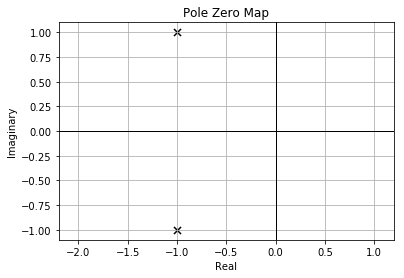

$G_P(s)=\frac{1}{s^2+2s+2}$

In [25]:
G1 = control.TransferFunction([1],[1, 2, 2])

control.pzmap(G1)
plt.grid()

print('Iz položaja polova i nula u kompleksnoj ravnini odredite prijenosnu funkciju sustava, ako je pojačanje Kp=1')
plt.show()
display(Markdown('$G_P(s)=\\frac{1}{s^2+2s+2}$'))

### Stabilnost

In [13]:
# stabilnost sustava - polovi
print('Odredite stabilnost sustava definiranih prijenosnim funkcijama:')
display(Markdown('$G(s)=\\frac{s-1}{s^2+2s+1}$'))
print('R: stabilan proces\n')
display(Markdown('$G(s)=\\frac{s+1}{(s+3)(s-2)(s+1)}$'))
print('R: nestabilan proces\n')

Odredite stabilnost sustava definiranih prijenosnim funkcijama:


$G(s)=\frac{s-1}{s^2+2s+1}$

R: stabilan proces



$G(s)=\frac{s+1}{(s+3)(s-2)(s+1)}$

R: nestabilan proces



In [14]:
Gp = '$G_P(s)=\\frac{1}{(s-3)}$'
print('Na proces ')
display(Markdown(Gp))
     
print('spojen je P regulator s pojačanjem Kr=2. Odredite stabilnost procesa i rezultantnog sustava.')

print('\nR: ', 'Proces je nestabilan, rezultantni sustav je nestabilan.')

Na proces 


$G_P(s)=\frac{1}{(s-3)}$

spojen je P regulator s pojačanjem Kr=2. Odredite stabilnost procesa i rezultantnog sustava.

R:  Proces je nestabilan, rezultantni sustav je nestabilan.


Iz Bode dijagrama odredite fazno i amplitudno osiguranje sustava.

 R: A.O.=12.04dB, F.O.=67.60°


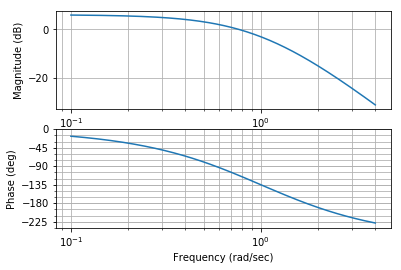

In [15]:
# Bode prikaz, stabilnost
G=control.tf([2],[1,3, 3, 1])
#G = lti([1], [1, 1, 1, 1])
w_min = 1e-1
w_max = 4
ws = np.exp(np.linspace(np.log(w_min), np.log(w_max), 200))

#mag, phase, w=control.bode(G, Plot=True, dB=True)
mag, phase, w=control.bode(G, omega=ws, Plot=True, dB=True)
(gm, pm, wg, wp) = control.margin(G)

print('Iz Bode dijagrama odredite fazno i amplitudno osiguranje sustava.')
print('\n R: A.O.={:.2f}dB, F.O.={:.2f}°'.format(control.mag2db(gm), pm))

Iz krivulje mjesta korijena procesa s dodanim P regulatorom možemo zaključiti da je:


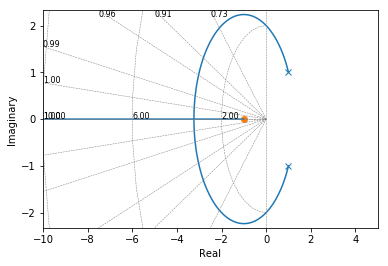

R:
Početni sustav nestabilan, sustav upravljanja postaje stabilan uz dovoljno veliko pojačanje Kp


In [16]:
G = control.tf([1,1],[1, -2, 2])

control.root_locus(G, xlim=[-10, 5])
#plt.grid()
#plt.xlim(-4,2)

print('Iz krivulje mjesta korijena procesa s dodanim P regulatorom možemo zaključiti da je:')
plt.show()
print('R:')
print('Početni sustav nestabilan, sustav upravljanja postaje stabilan uz dovoljno veliko pojačanje Kp')


Odredite stabilnost sustava I, II, III i IV prema odzivu na skokovitu funkciju


C:\Users\ivan.miskovic\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


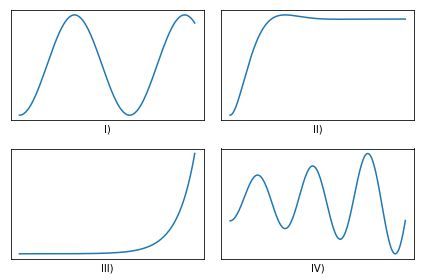

R: 
I) na rubu stabilnosti, II) stabilan, III) nestabilan, IV) nestabilan


In [17]:
G1 = lti([1],[1, 2, 2])
G2 = lti([1],[1, 0, 1])
G3 = lti([1],[1, -1])
G4 = lti([],[0.1+2j, 0.1-2j],1)

T = np.linspace(0,10, 200)
t1, y1 = G2.step(T=T)
t2, y2 = G1.step(T=T)
t3, y3 = G3.step(T=T)
t4, y4 = G4.step(T=T)

fig = plt.figure()
ax1 = fig.add_subplot(221, projection=None)
ax2 = fig.add_subplot(222, projection=None)
ax3 = fig.add_subplot(223, projection=None)
ax4 = fig.add_subplot(224, projection=None)

ax1.set_xlabel('I)')
ax2.set_xlabel('II)')
ax3.set_xlabel('III)')
ax4.set_xlabel('IV)')

ax1.tick_params( axis='y', which='both', left='off', labelleft='off')
ax2.tick_params( axis='y', which='both', left='off', labelleft='off')
ax3.tick_params( axis='y', which='both', left='off', labelleft='off')
ax4.tick_params( axis='y', which='both', left='off', labelleft='off')
ax1.tick_params( axis='x', which='both', bottom='off', labelbottom='off')
ax2.tick_params( axis='x', which='both', bottom='off', labelbottom='off')
ax3.tick_params( axis='x', which='both', bottom='off', labelbottom='off')
ax4.tick_params( axis='x', which='both', bottom='off', labelbottom='off')

ax1.plot(t1,y1)
ax2.plot(t2,y2)
ax3.plot(t3,y3)
ax4.plot(t4,y4)
#plt.grid()
#plt.xlim(4,2)
fig.tight_layout()
print('Odredite stabilnost sustava I, II, III i IV prema odzivu na skokovitu funkciju')
plt.show()

print('R: ')
print('I) na rubu stabilnosti, II) stabilan, III) nestabilan, IV) nestabilan')
